# ECS 171 Bop or Flop: Data Analysis
Using exploratory data analysis to find the correlation of data and to understand the data distribution.


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.figure_factory as ff


dataset = pd.read_csv('spotify_songs.csv')
dataset.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


### Distribution of All Numeric Variables

                                 Numeric Features Distribution                                  


IndexError: index 12 is out of bounds for axis 0 with size 12

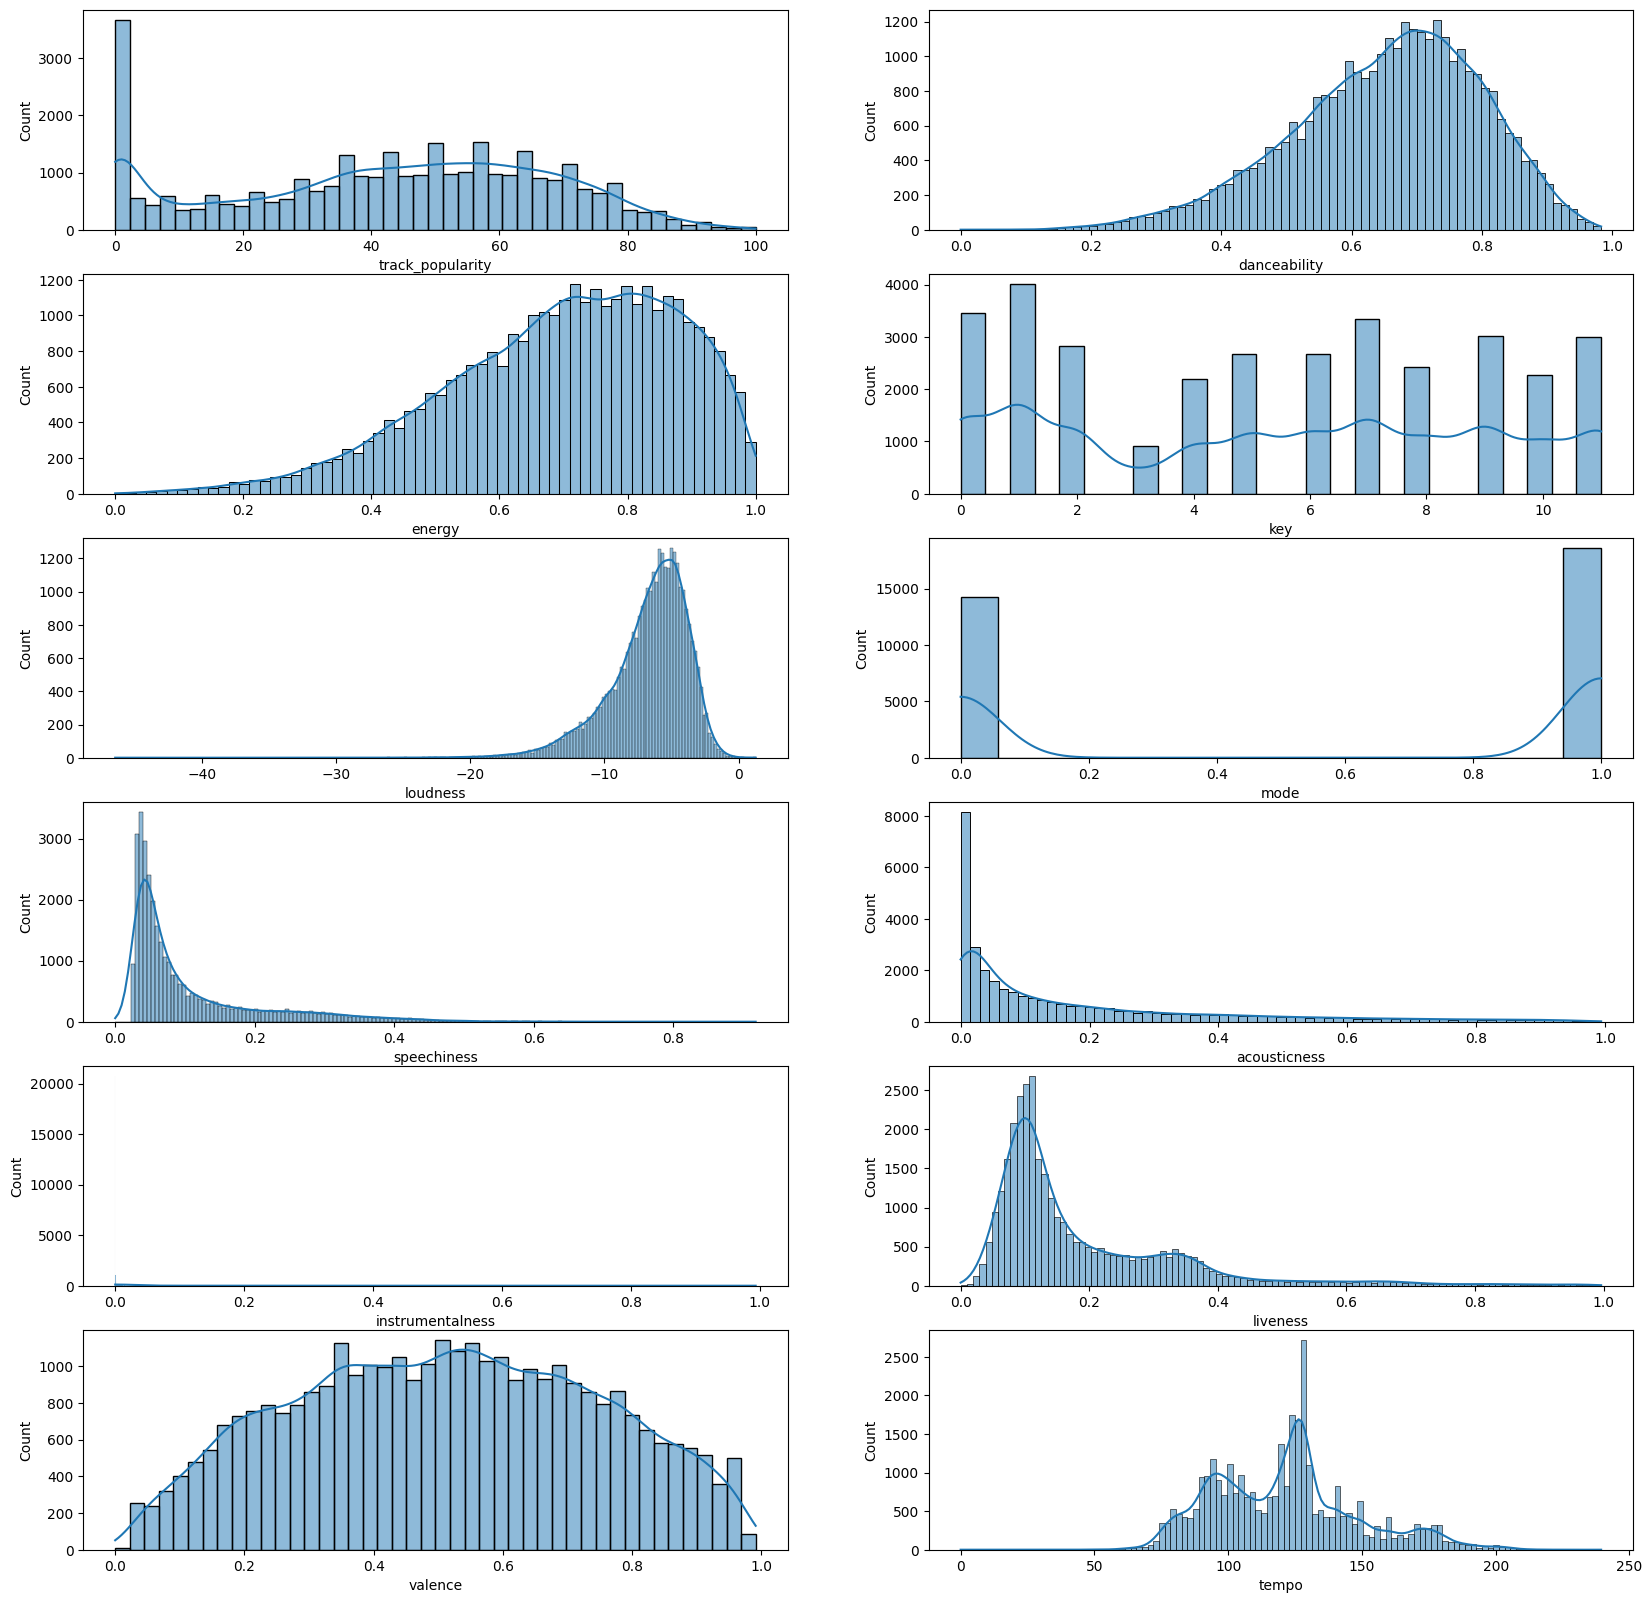

In [16]:
import math
print('\033[1mNumeric Features Distribution'.center(100))

n = 5
cols = dataset.drop(['track_album_id', 'track_album_name', 'track_album_release_date', 'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre'], axis=1).columns.tolist()[3:]

n_col = len(cols) 

clr=['r','g','b','g','b','r']

# plt.figure(
#     figsize=[15,4*math.ceil(n_col/n)])
fig, axes = plt.subplots(6,2, figsize=(20,20))
axes = axes.flatten()
i = 0
for index in range(n_col):
    # plt.subplot(math.ceil(n_col/3),n,i+1)
    # sns.displot(dataset[cols[i]], kde=True, color=list(np.random.randint(0, 255, 3) / 255))
    sns.histplot(dataset[cols[index]], kde=True, ax=axes[i])
    i+=1
    
plt.tight_layout()
plt.show()

In [20]:
dataset.shape

(32833, 23)

count    32833.000000
mean        42.477081
std         24.984074
min          0.000000
25%         24.000000
50%         45.000000
75%         62.000000
max        100.000000
Name: track_popularity, dtype: float64

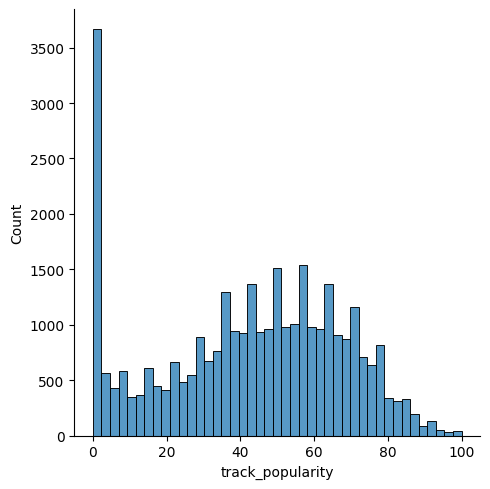

In [24]:
sns.displot(data=dataset, x='track_popularity')
dataset['track_popularity'].describe()

### Correlation Matrix

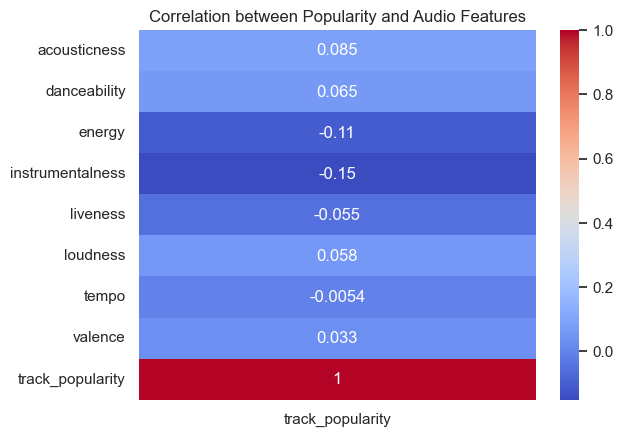

<Figure size 1000x1500 with 0 Axes>

In [48]:
# Subset the correlation matrix to include only the variables of interest
corr_matrix = dataset[['acousticness','danceability','energy','instrumentalness','liveness','loudness','tempo','valence','track_popularity']].corr()

# Create heatmap plot
sns.heatmap(corr_matrix.loc[:, ['track_popularity']], annot=True, cmap='coolwarm')

# Set plot title and figure
plt.title('Correlation between Popularity and Audio Features')
plt.figure(figsize=(10,15))

# Show plot
plt.show()

In [47]:
# Generate the plot
# take out String columns
data = dataset.copy().drop(columns=['track_artist', 'track_name', 'track_id', 'track_album_id', 'track_album_release_date', 'playlist_subgenre', 'playlist_genre']).corr()
pcmp = sns.heatmap(data, vmin=-1, vmax=1, center=0, cmap= 'RdBu')

ValueError: could not convert string to float: "I Don't Care (with Justin Bieber) [Loud Luxury Remix]"

### Pairplot (Scatter Plot Matrix)

In [42]:
# Generate a pairplot (scatter plot matrix)
fig = ff.create_scatterplotmatrix(dataset, diag='histogram', index='track_artist', opacity=.8)
fig.update_layout(
    autosize=False,
    width=800,
    height=800,
)
fig.show()

PlotlyError: Error in dataframe. Make sure all entries of each column are either numbers or strings.

### Boxplot

In [46]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(x = dataset.popularity, flierprops = dict(markerfacecolor = 'orange', marker = 'o'))
plt.title('Box Plot', fontsize=15)
plt.xlabel('track_popularity', fontsize=14)
plt.show()

AttributeError: 'DataFrame' object has no attribute 'popularity'

<Figure size 1000x500 with 0 Axes>